In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
vivek468_superstore_dataset_final_path = kagglehub.dataset_download('vivek468/superstore-dataset-final')

print('Data source import complete.')


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/superstore-dataset-final/Sample - Superstore.csv


In [ ]:

df = pd.read_csv("/kaggle/input/superstore-dataset-final/Sample - Superstore.csv", encoding='ISO-8859-1')
pd.options.display.max_columns =None
pd.options.display.max_rows =None
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,5/4/2017,5/9/2017,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,California,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

**Change data types to datetime**

In [ ]:
df["Order Date"]=pd.to_datetime(df["Order Date"])
df["Ship Date"]=pd.to_datetime(df["Ship Date"])

**Check null values**

In [ ]:
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

**Describtion of numerical columns**

In [ ]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


**Check duplicated values**

In [ ]:
df.duplicated().sum()

0

**Show categorical data**

In [ ]:
df_cat=df[["Ship Mode","Customer ID","Customer Name","Segment","Country","City","State","Region","Product ID","Category","Sub-Category","Product Name"]]
df_cat.head()

,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
0,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase
1,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,..."
2,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...
3,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table
4,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System


**Show number of unique values in categorical data**

In [ ]:
for feature in df_cat.columns:
    print(feature,":",df[feature].nunique())

Ship Mode : 4
Customer ID : 793
Customer Name : 793
Segment : 3
Country : 1
City : 531
State : 49
Region : 4
Product ID : 1862
Category : 3
Sub-Category : 17
Product Name : 1850


In [ ]:
df["Order Date"].nunique()

1237

In [ ]:
df["Ship Date"].nunique()

1334

# Exploratory Data Analysis

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


**What are the top selling products?**

In [ ]:
product_group = df.groupby("Product Name")["Sales"].sum()
product_group.head()

Product Name
"While you Were Out" Message Book, One Form per Page     25.228
#10 Gummed Flap White Envelopes, 100/Box                 41.300
#10 Self-Seal White Envelopes                           108.682
#10 White Business Envelopes,4 1/8 x 9 1/2              488.904
#10- 4 1/8" x 9 1/2" Recycled Envelopes                 286.672
Name: Sales, dtype: float64

In [ ]:
top_selling_products=product_group.sort_values(ascending=False)

In [ ]:
top_5_selling_products=pd.DataFrame(top_selling_products[:5])

top_5_selling_products

,Sales
Product Name,
Canon imageCLASS 2200 Advanced Copier,61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.384
Cisco TelePresence System EX90 Videoconferencing Unit,22638.480
HON 5400 Series Task Chairs for Big and Tall,21870.576
GBC DocuBind TL300 Electric Binding System,19823.479


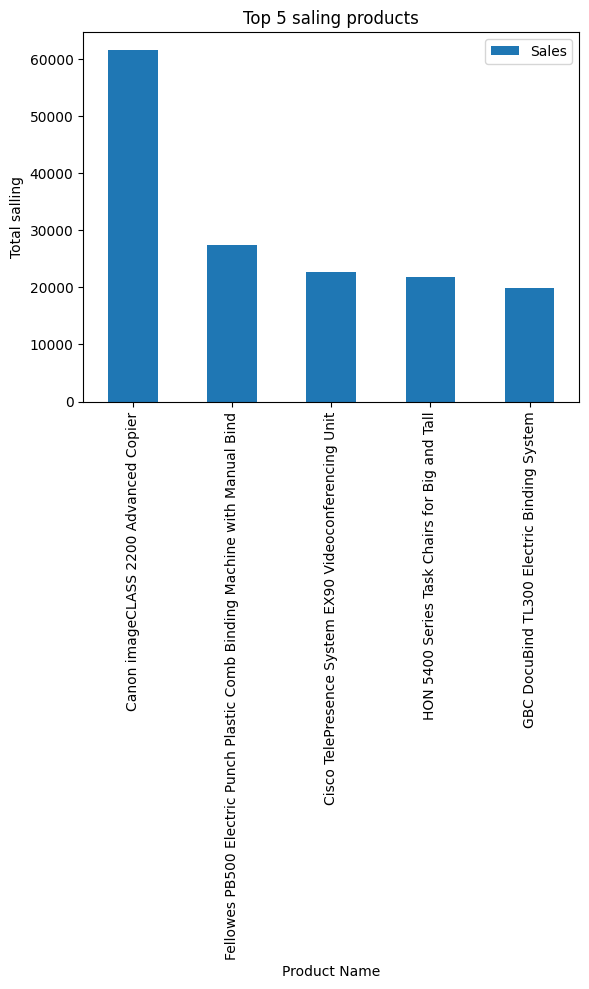

In [ ]:
top_5_selling_products.plot(kind="bar")
plt.title("Top 5 saling products")
plt.xlabel("Product Name")
plt.ylabel("Total salling")
plt.show()

**what are the top profit products?**

In [ ]:
product_group = df.groupby("Product Name")["Profit"].sum()
product_group.head()

Product Name
"While you Were Out" Message Book, One Form per Page     10.3880
#10 Gummed Flap White Envelopes, 100/Box                 16.7678
#10 Self-Seal White Envelopes                            52.1230
#10 White Business Envelopes,4 1/8 x 9 1/2              223.1408
#10- 4 1/8" x 9 1/2" Recycled Envelopes                 115.2806
Name: Profit, dtype: float64

In [ ]:
top_profit_products=product_group.sort_values(ascending=False)

In [ ]:
top_5_profit_products=pd.DataFrame(top_profit_products[:5])

top_5_profit_products

,Profit
Product Name,
Canon imageCLASS 2200 Advanced Copier,25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,7753.0390
Hewlett Packard LaserJet 3310 Copier,6983.8836
Canon PC1060 Personal Laser Copier,4570.9347
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",4094.9766


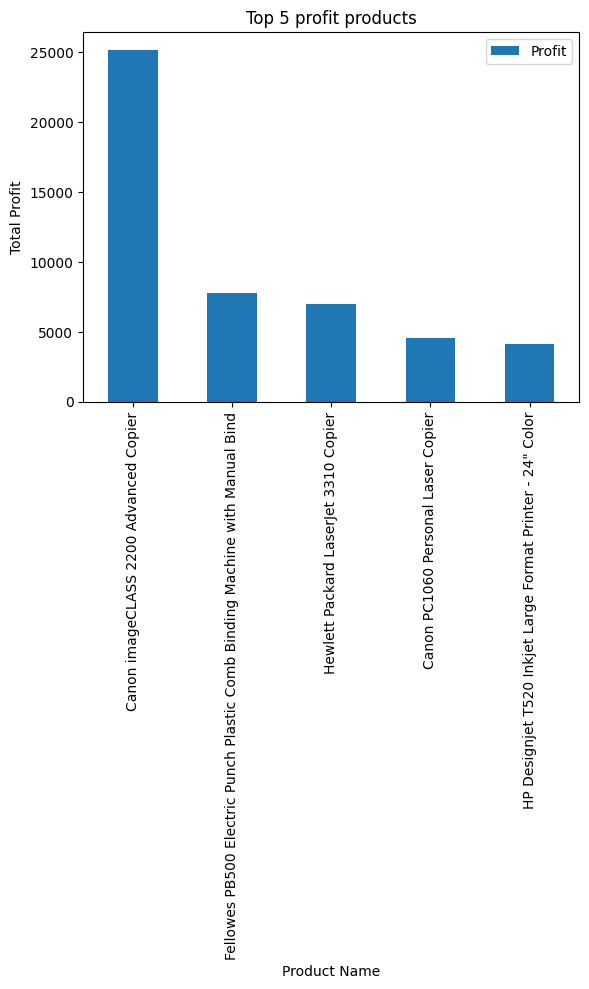

In [ ]:
top_5_profit_products.plot(kind="bar")
plt.title("Top 5 profit products")
plt.xlabel("Product Name")
plt.ylabel("Total Profit")
plt.show()

**Are the top selling products the most porofitable?**

In [ ]:
top_5_profit_products.index==top_5_selling_products.index

array([ True,  True, False, False, False])

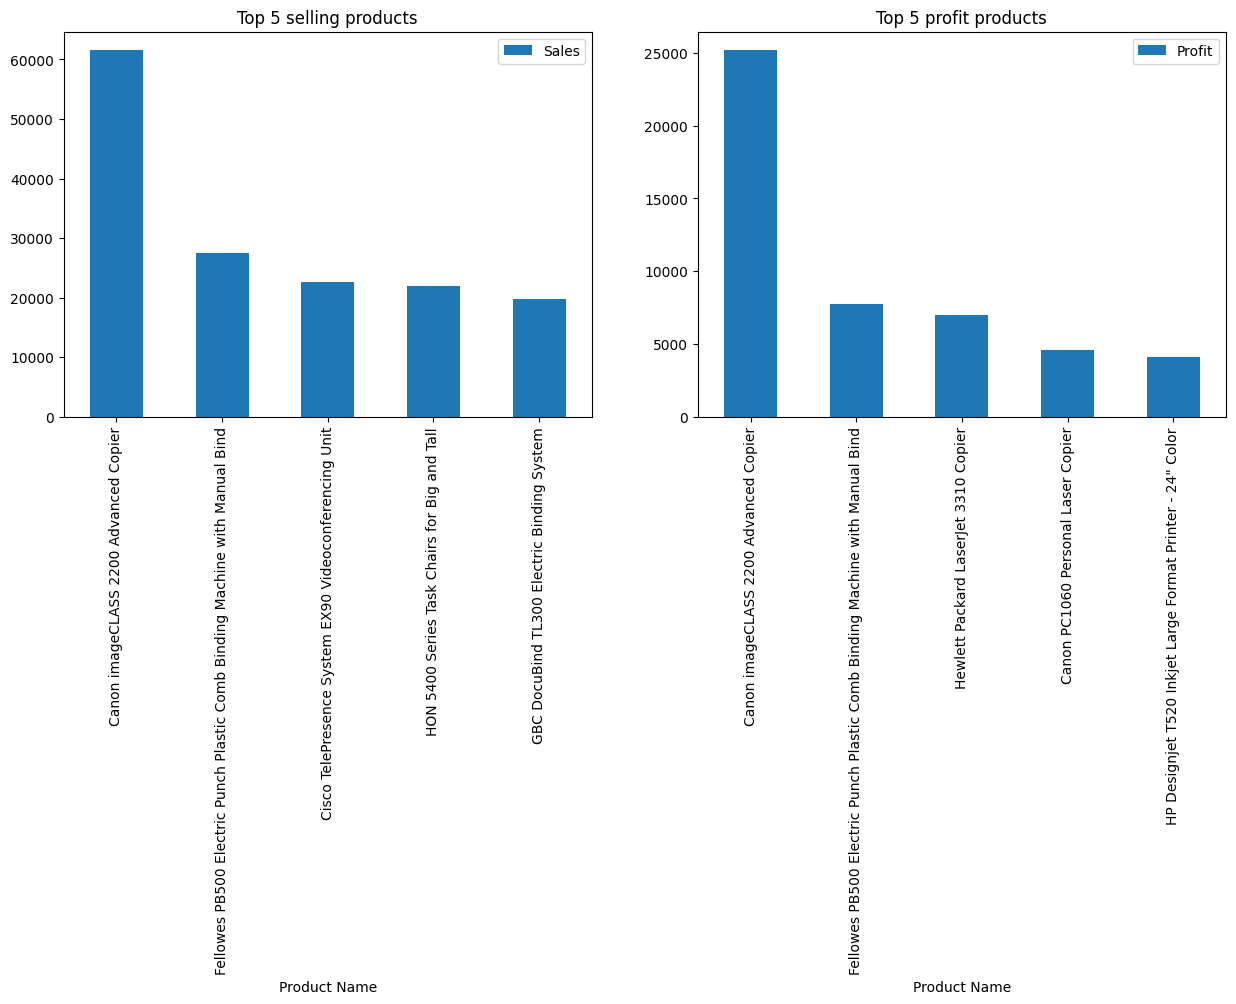

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15, 5))
top_5_selling_products.plot(kind="bar",y="Sales",ax=ax1)
ax1.set_title("Top 5 selling products")
top_5_profit_products.plot(kind="bar",y="Profit",ax=ax2)
ax2.set_title("Top 5 profit products")
plt.show()

# Conclusion
**Top 5 selling products:**
 * Canon imageCLASS 2200 Advanced Copier
 *
Fellowes PB500 Electric Punch Plastic Comb Binding Machine       with Manual Bind4 *
Cisco TelePresence System EX90 Videoconferencing Uni8 * 0
HON 5400 Series Task Chairs for Big and Tall	21870.5 * 76
GBC DocuBind TL300 Electric Binding Sy
    
**Top 5 profit products:**

 * Canon imageCLASS 2200 Advanced Copier
 * Fellowes PB500 Electric Punch Plastic Comb Binding Machine       with Manual Bind
 * Hewlett Packard LaserJet 3310 Copier
 * Canon PC1060 Personal Laser Copier
 * HP Designjet T520 Inkjet Large Format Printer - 24" Color
7or
      m	**

In [ ]:
df.Region.value_counts()

Region
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64

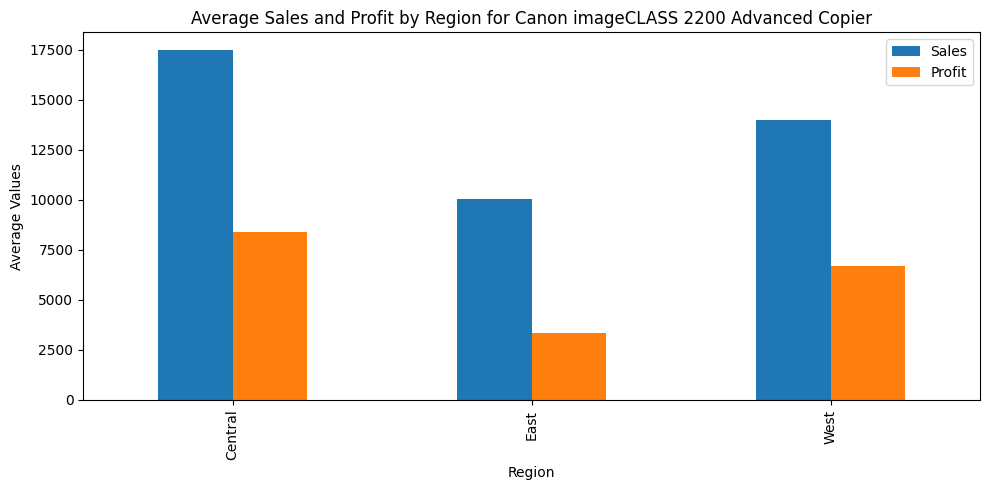

In [ ]:

Product = df[df["Product Name"] == "Canon imageCLASS 2200 Advanced Copier"]

region_group = Product.groupby("Region")[["Sales", "Profit"]].mean()


region_group.plot(kind="bar", figsize=(10, 5))


plt.title("Average Sales and Profit by Region for Canon imageCLASS 2200 Advanced Copier")
plt.ylabel("Average Values")
plt.xlabel("Region")


plt.tight_layout()
plt.show()


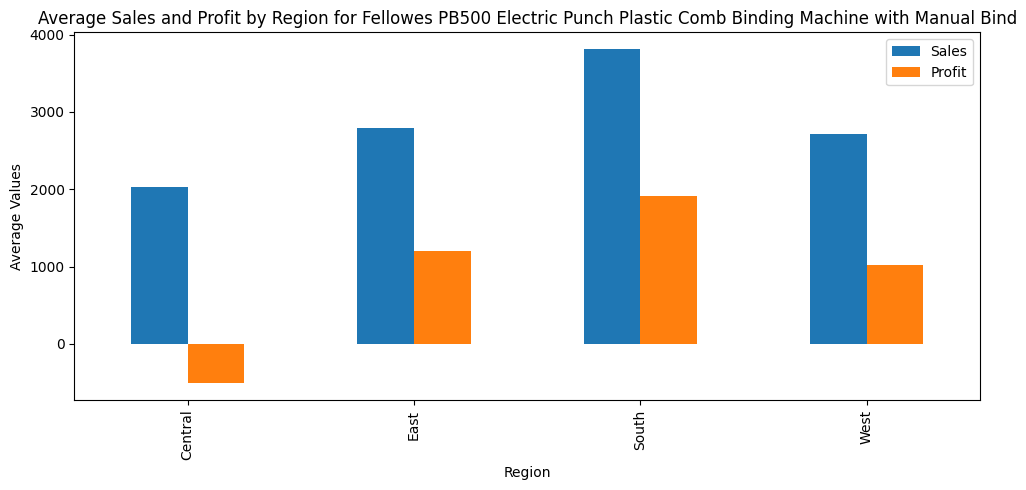

In [ ]:

Product = df[df["Product Name"] == "Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind"]

region_group = Product.groupby("Region")[["Sales", "Profit"]].mean()


region_group.plot(kind="bar", figsize=(10, 5))


plt.title("Average Sales and Profit by Region for Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind")
plt.ylabel("Average Values")
plt.xlabel("Region")


plt.tight_layout()
plt.show()


In [ ]:
Product = df[(df["Product Name"] == "Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind") & (df["Region"] == "Central")]
Product

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2846,2847,CA-2017-152093,2017-09-10,2017-09-15,Standard Class,SN-20560,Skye Norling,Home Office,United States,Chicago,Illinois,60653,Central,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,762.594,3,0.8,-1143.891
5310,5311,CA-2017-131254,2017-11-19,2017-11-21,First Class,NC-18415,Nathan Cano,Consumer,United States,Houston,Texas,77095,Central,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,1525.188,6,0.8,-2287.782
7683,7684,CA-2015-120782,2015-04-28,2015-05-01,First Class,SD-20485,Shirley Daniels,Home Office,United States,Midland,Michigan,48640,Central,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,3812.970,3,0.0,1906.485


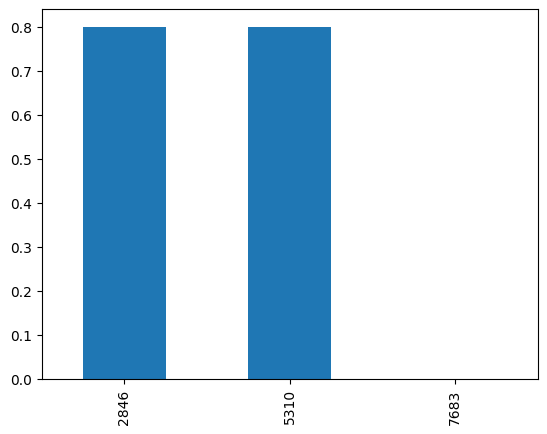

In [ ]:

Product["Discount"].plot(kind="bar")
plt.show()

the company loses when it sells **Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind** product in the central as it make 80% discount on 2 products from 3 products

**What is the sales trend over time(monthly,yearly)?**

/tmp/ipykernel_30/3780637025.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = monthly_sales.resample('M').sum()


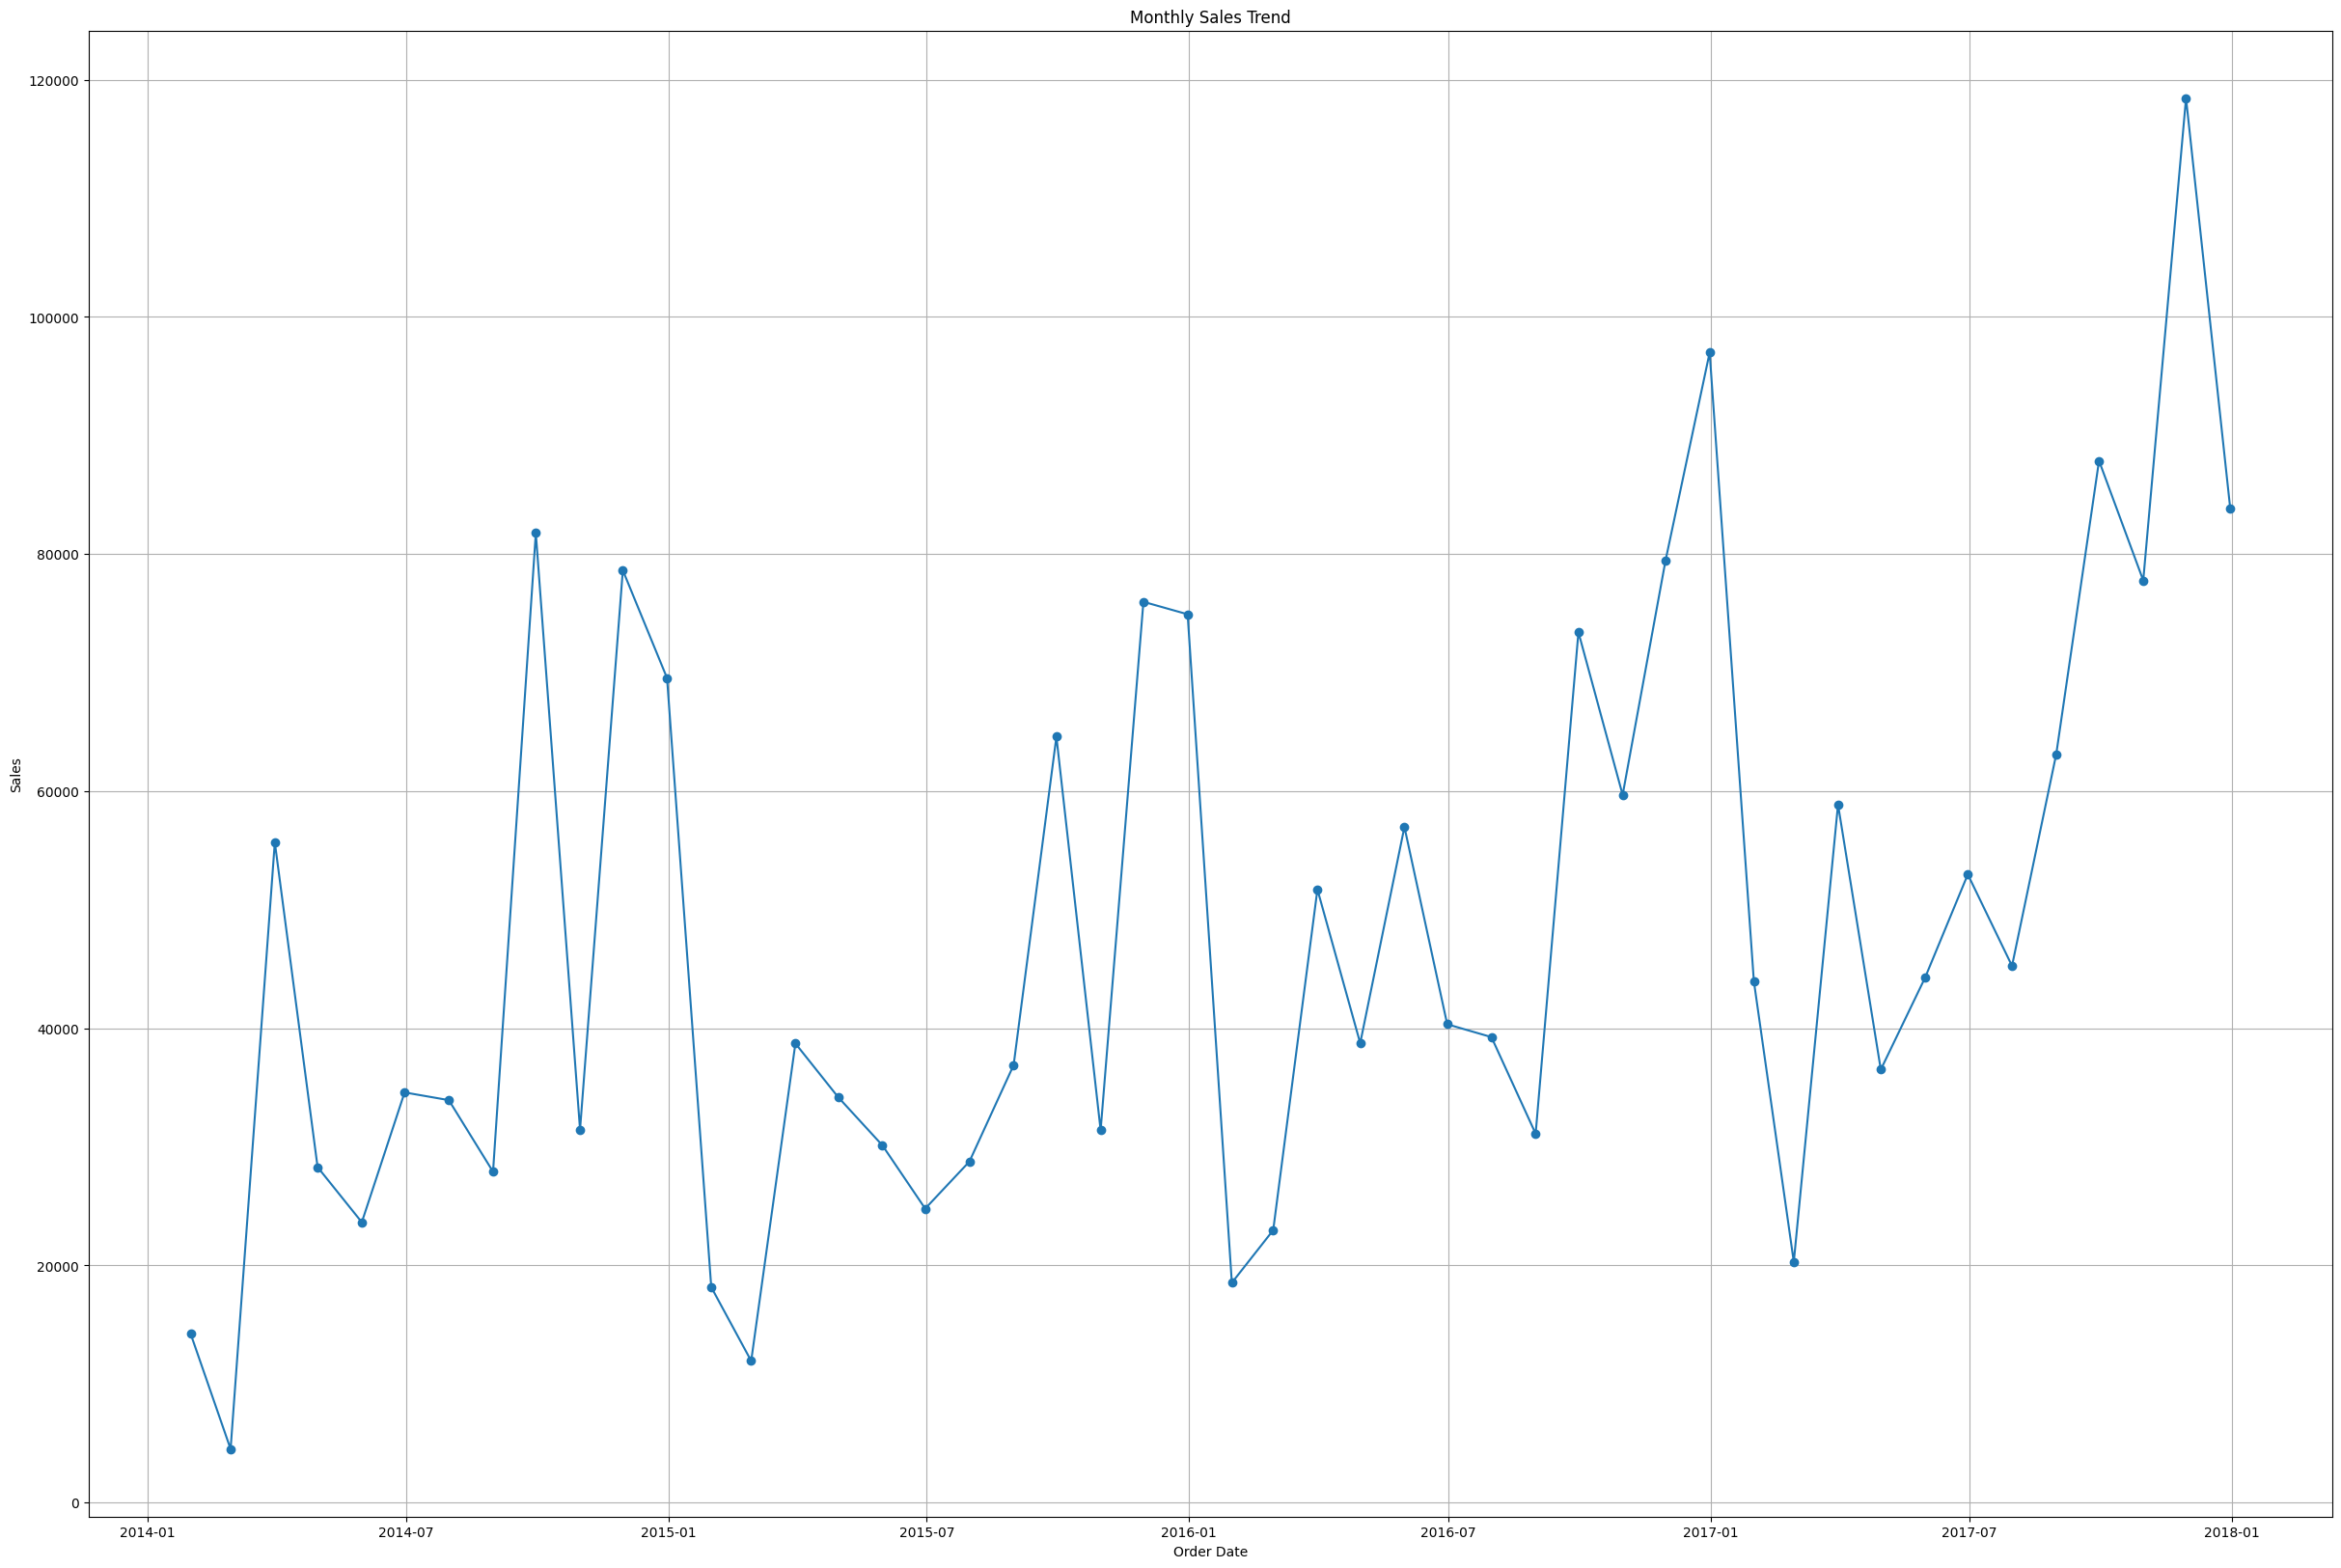

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
monthly_sales = df.groupby(["Order Date"], as_index=False).sum(numeric_only=True)


# Set 'Order Date' as the index
monthly_sales = monthly_sales.set_index("Order Date")

# Resample the data by month and sum
monthly_sales = monthly_sales.resample('M').sum()

# Plot the monthly sales trend
plt.figure(figsize=(30,20))
plt.plot(monthly_sales["Sales"], marker='o')  # Adding markers for clarity
plt.xlabel("Order Date")
plt.ylabel("Sales")
plt.title("Monthly Sales Trend")
plt.grid(True)  # Adding grid lines for better readability
plt.show()

/tmp/ipykernel_30/4181890083.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_sales=monthly_sales.resample("Y").sum()


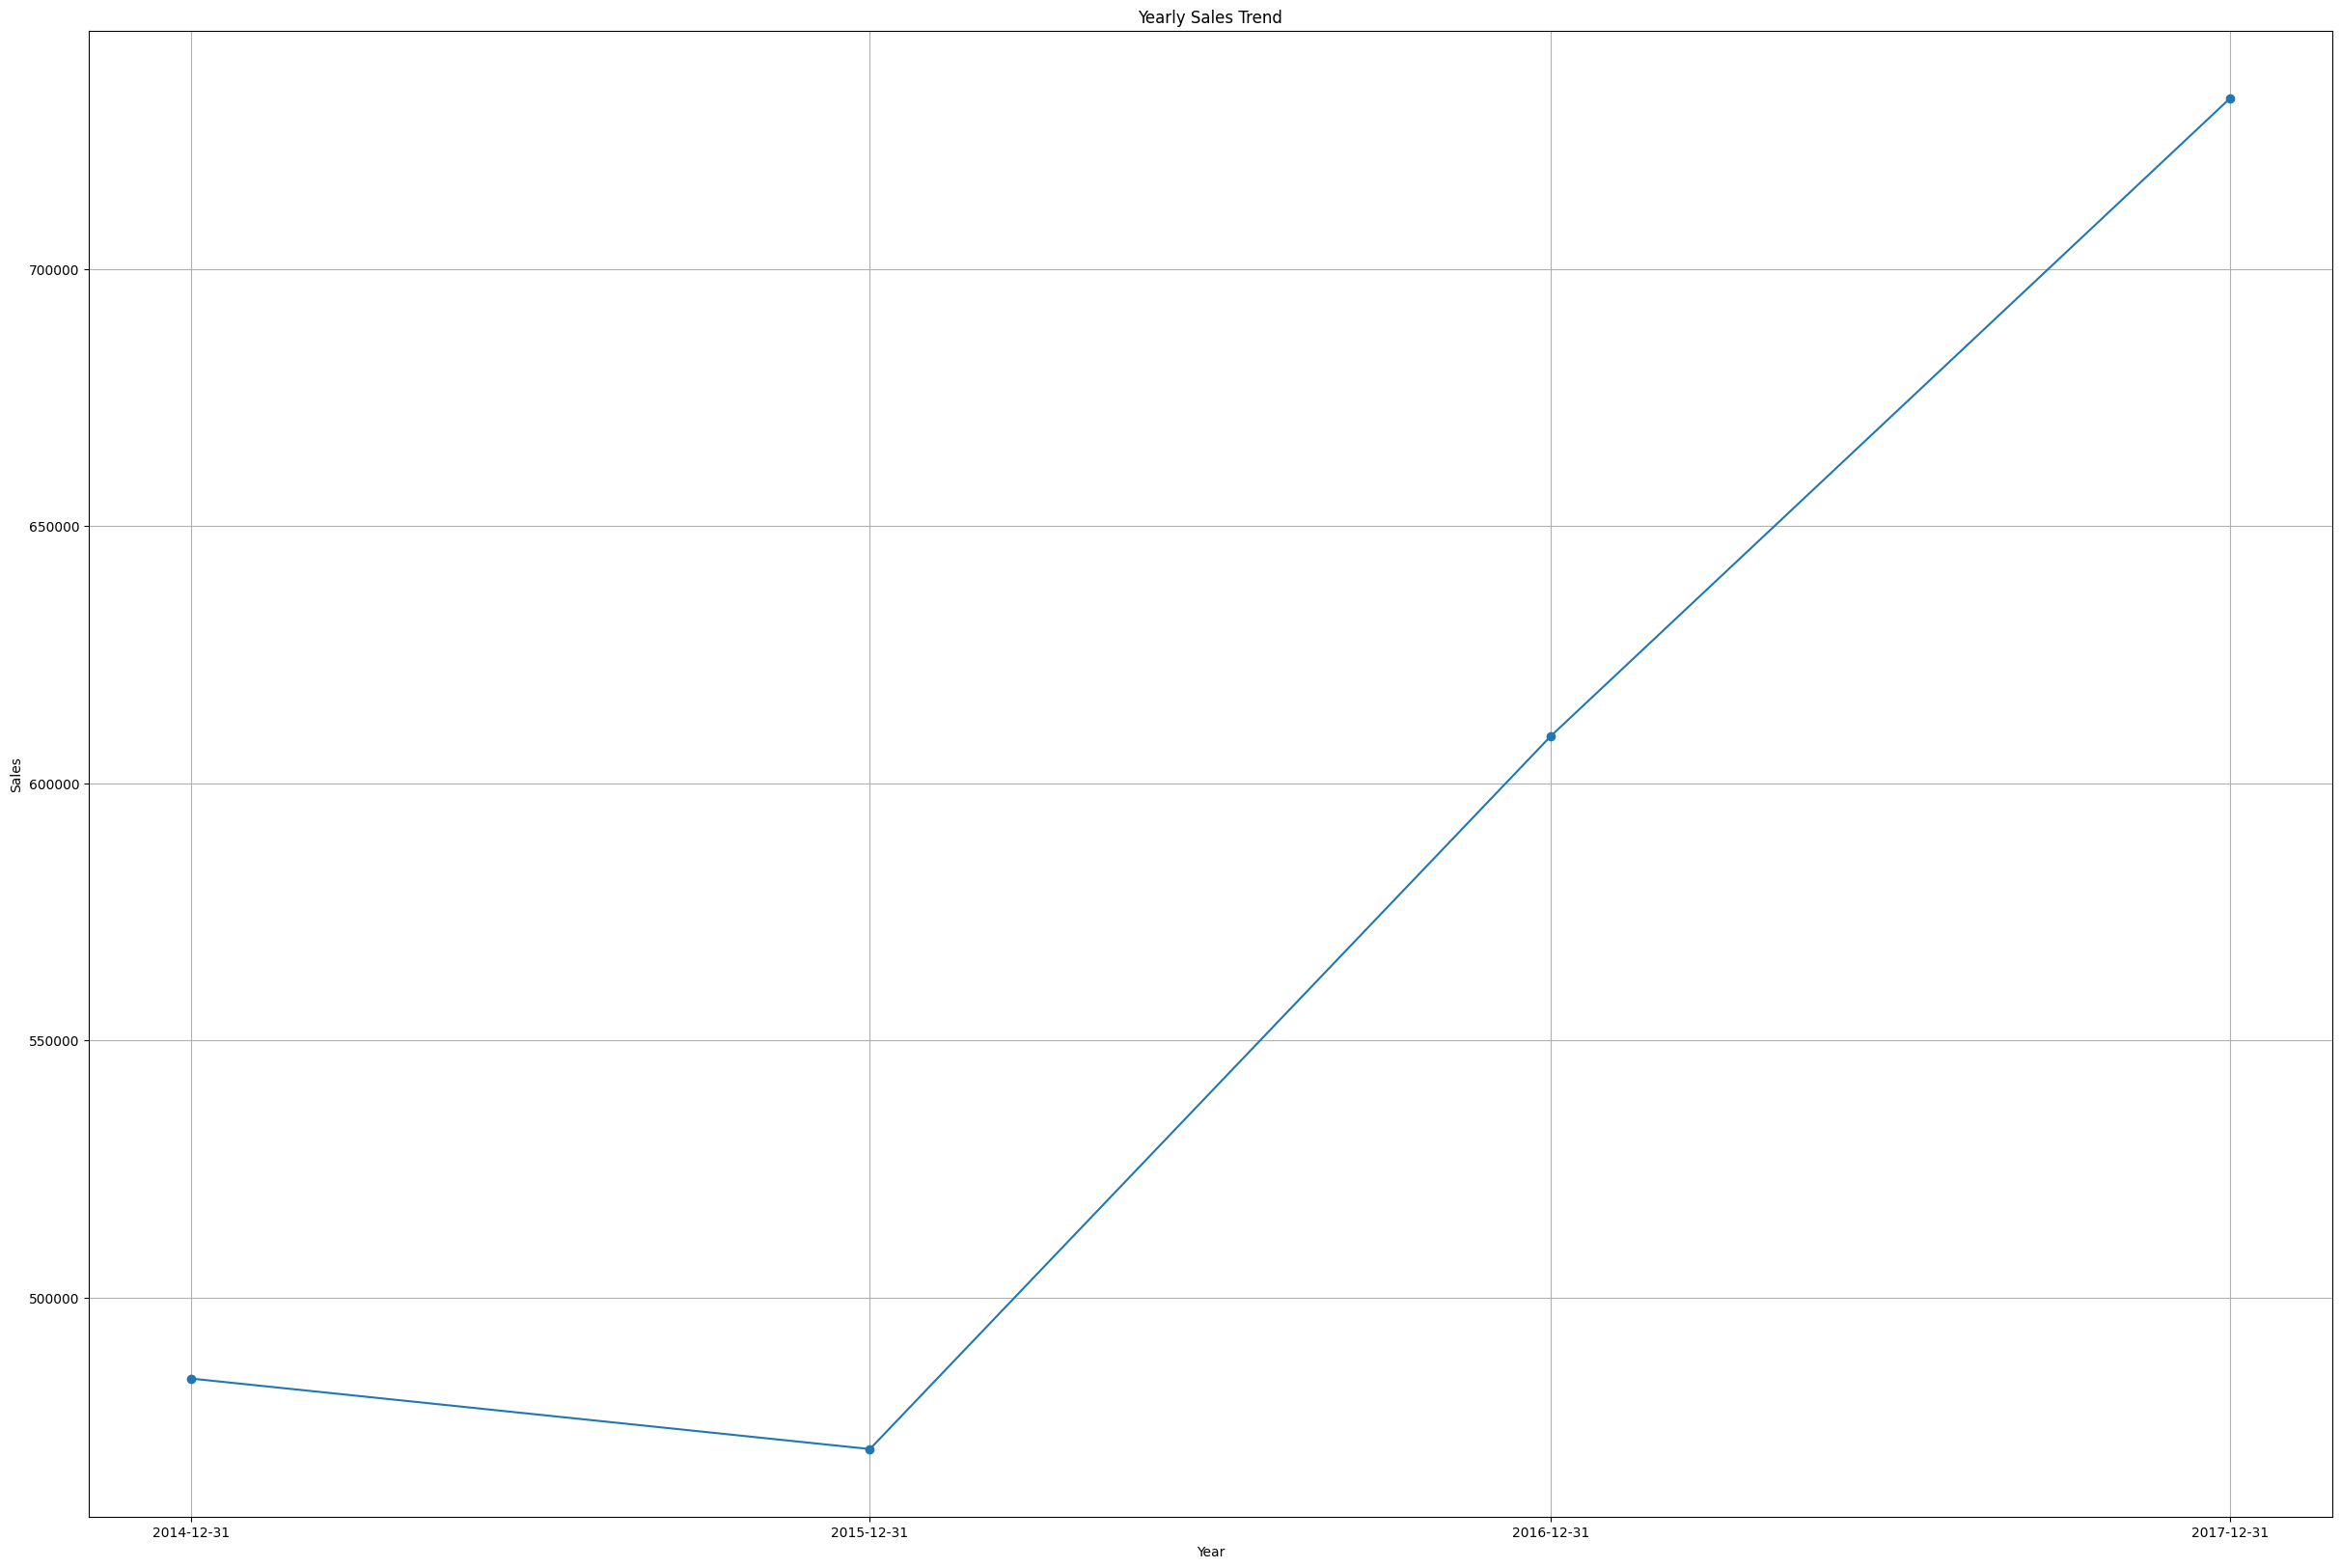

In [ ]:
yearly_sales=monthly_sales.resample("Y").sum()
# Plot the yearly sales trend
plt.figure(figsize=(30,20))
plt.plot(yearly_sales["Sales"], marker='o')
plt.xlabel("Year")
plt.ylabel("Sales")
plt.title("Yearly Sales Trend")
plt.grid(True)
plt.xticks(yearly_sales.index)
plt.show()

/tmp/ipykernel_30/4202187990.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = monthly_sales.resample('M').sum()


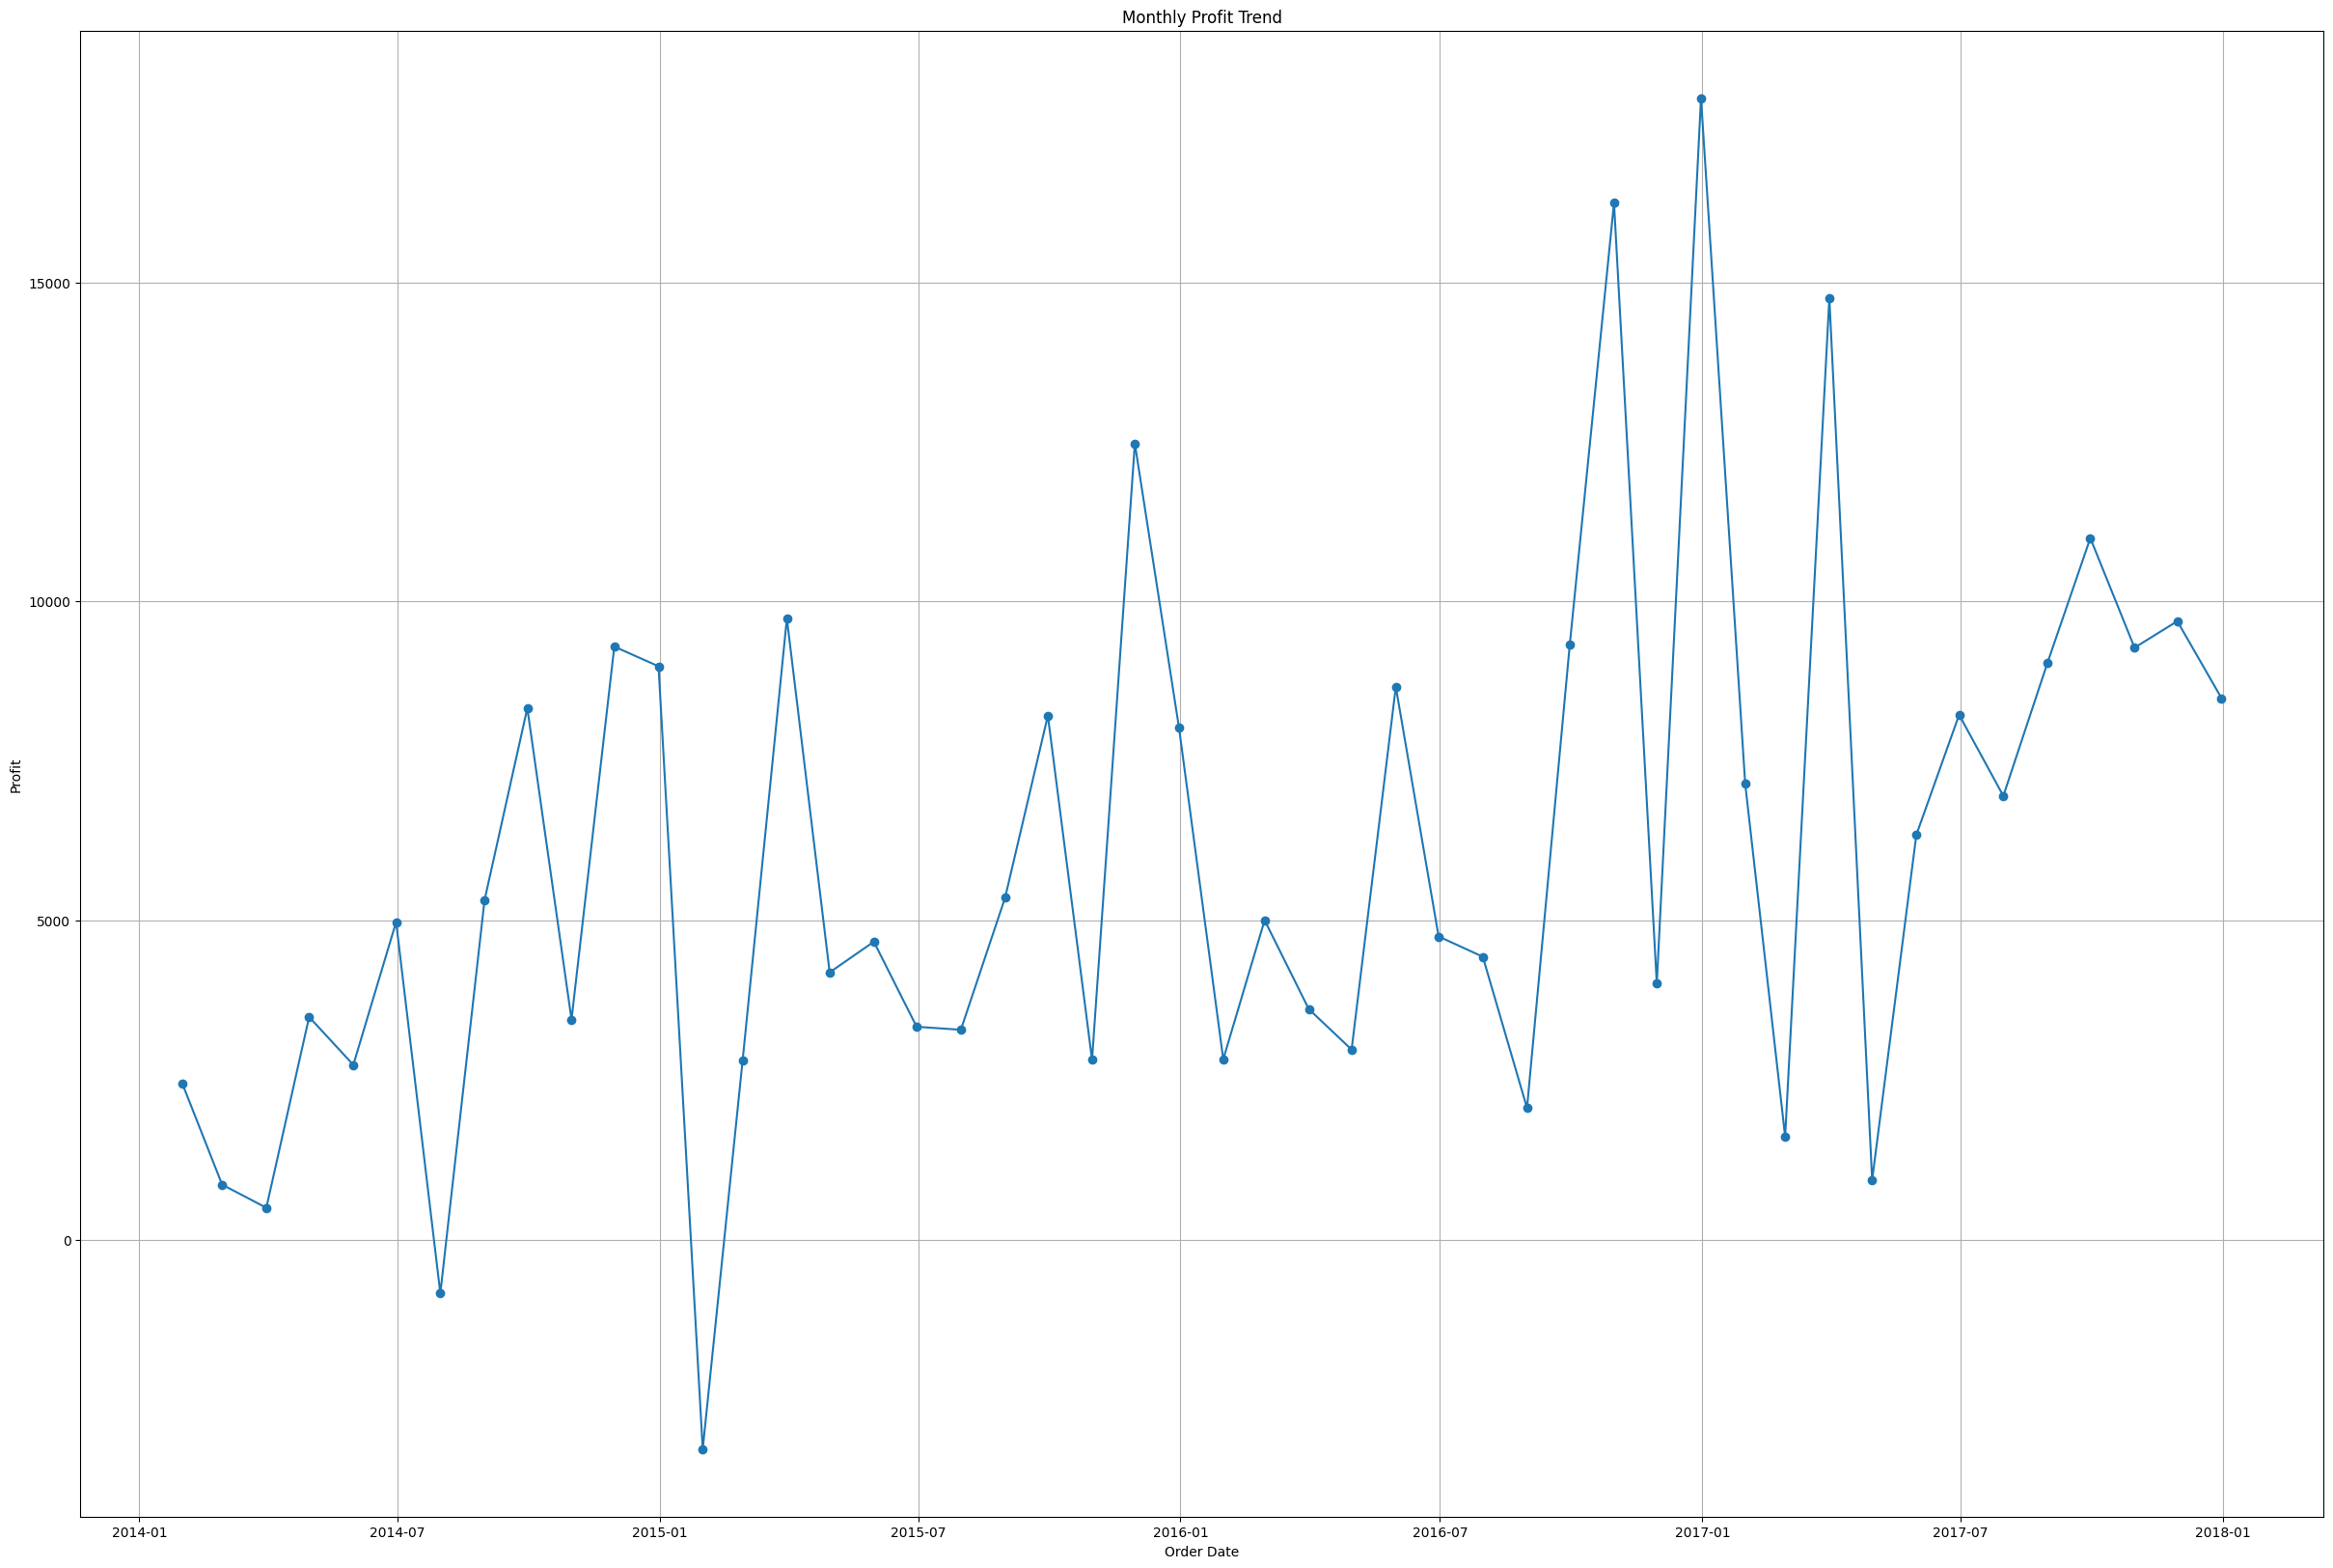

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
monthly_sales = df.groupby(["Order Date"], as_index=False).sum(numeric_only=True)

monthly_sales = monthly_sales.set_index("Order Date")


monthly_sales = monthly_sales.resample('M').sum()

plt.figure(figsize=(30,20))
plt.plot(monthly_sales["Profit"], marker='o')  # Adding markers for clarity
plt.xlabel("Order Date")
plt.ylabel("Profit")
plt.title("Monthly Profit Trend")
plt.grid(True)
plt.show()

/tmp/ipykernel_30/3806318401.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_sales=monthly_sales.resample("Y").sum()


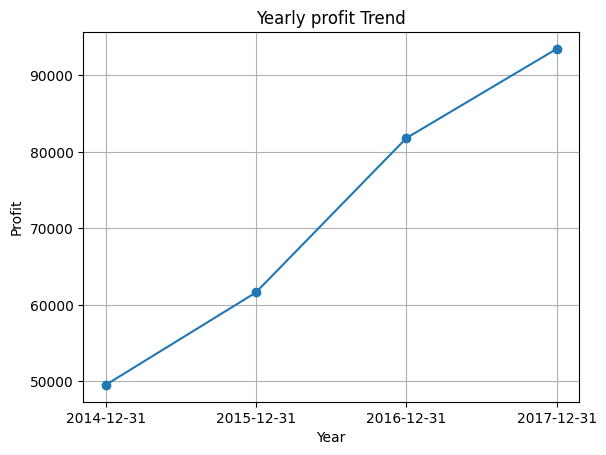

In [ ]:
yearly_sales=monthly_sales.resample("Y").sum()
# Plot the yearly sales trend
plt.figure()
plt.plot(yearly_sales["Profit"], marker='o')
plt.xlabel("Year")
plt.ylabel("Profit")
plt.title("Yearly profit Trend")
plt.grid(True)
plt.xticks(yearly_sales.index)
plt.show()

**The General trend of the company is profit ,but there are some periods in which profits decrease and then rise again , I think it's because the discountes.**

# what region & place generates the most sales?

In [ ]:
df_places=df[["Country","City","State","Region"]]
df_places.head()

,Country,City,State,Region
0,United States,Henderson,Kentucky,South
1,United States,Henderson,Kentucky,South
2,United States,Los Angeles,California,West
3,United States,Fort Lauderdale,Florida,South
4,United States,Fort Lauderdale,Florida,South


In [ ]:
for Place in df_places.columns:
    print(Place,":",df_places[Place].nunique())

Country : 1
City : 531
State : 49
Region : 4


In [ ]:
df_places=df[["City","State","Region","Sales","Profit"]]
df_places.head()

,City,State,Region,Sales,Profit
0,Henderson,Kentucky,South,261.9600,41.9136
1,Henderson,Kentucky,South,731.9400,219.5820
2,Los Angeles,California,West,14.6200,6.8714
3,Fort Lauderdale,Florida,South,957.5775,-383.0310
4,Fort Lauderdale,Florida,South,22.3680,2.5164


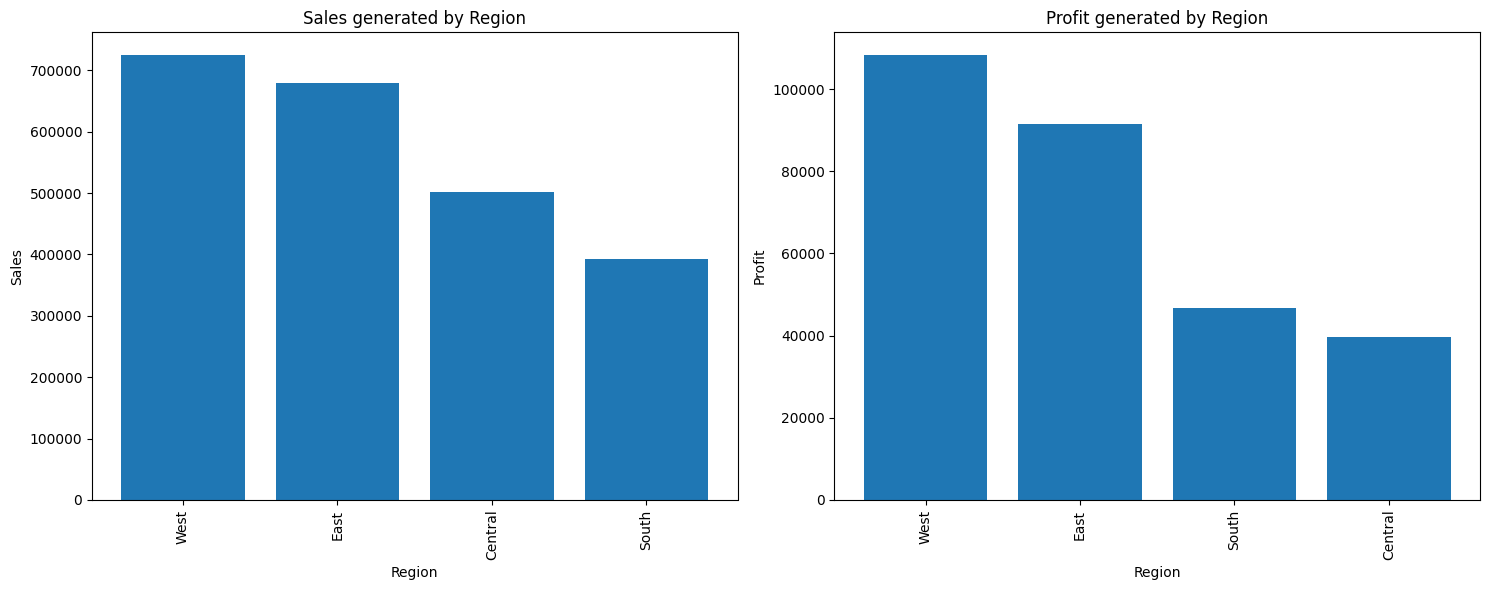

In [ ]:
grouped_sales = df_places.groupby(["Region"], as_index=False).sum()
grouped_sales.sort_values(by="Sales", ascending=False, inplace=True)

grouped_profit = df_places.groupby(["Region"], as_index=False).sum()
grouped_profit.sort_values(by="Profit", ascending=False, inplace=True)

# Creating subplots for Sales and Profit
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plotting Sales
ax1.bar(grouped_sales["Region"], grouped_sales["Sales"], align="center")
ax1.set_xlabel("Region")
ax1.set_ylabel("Sales")
ax1.set_title("Sales generated by Region")
ax1.tick_params(axis='x', rotation=90)

# Plotting Profit
ax2.bar(grouped_profit["Region"], grouped_profit["Profit"], align="center")
ax2.set_xlabel("Region")
ax2.set_ylabel("Profit")
ax2.set_title("Profit generated by Region")
ax2.tick_params(axis='x', rotation=90)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

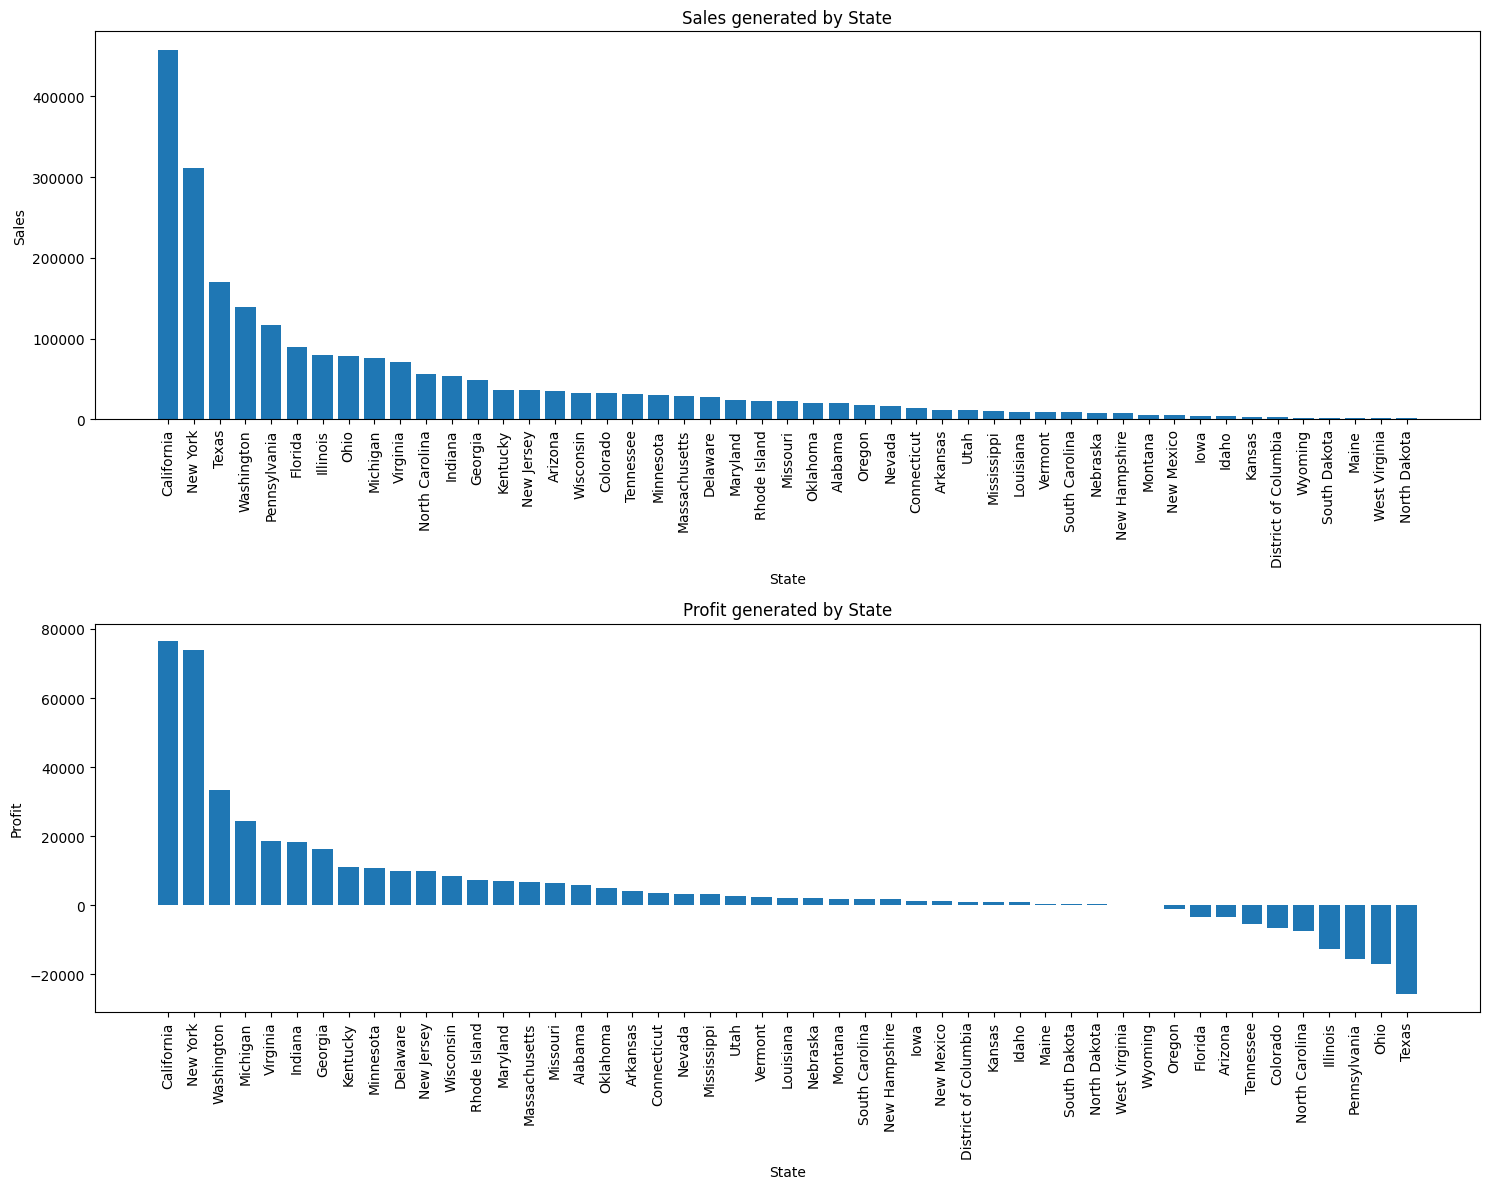

In [ ]:
grouped_sales = df_places.groupby(["State"], as_index=False).sum()
grouped_sales.sort_values(by="Sales", ascending=False, inplace=True)

grouped_profit = df_places.groupby(["State"], as_index=False).sum()
grouped_profit.sort_values(by="Profit", ascending=False, inplace=True)

# Creating subplots for Sales and Profit (2 rows, 1 column)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Plotting Sales
ax1.bar(grouped_sales["State"], grouped_sales["Sales"], align="center")
ax1.set_xlabel("State")
ax1.set_ylabel("Sales")
ax1.set_title("Sales generated by State")
ax1.tick_params(axis='x', rotation=90)

# Plotting Profit
ax2.bar(grouped_profit["State"], grouped_profit["Profit"], align="center")
ax2.set_xlabel("State")
ax2.set_ylabel("Profit")
ax2.set_title("Profit generated by State")
ax2.tick_params(axis='x', rotation=90)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [ ]:
losing_States=grouped_profit["Profit"] < 0
grouped_profit[losing_States]

,State,City,Region,Sales,Profit
35,Oregon,PortlandPortlandPortlandPortlandSalemSalemSale...,WestWestWestWestWestWestWestWestWestWestWestWe...,17431.1500,-1190.4705
8,Florida,Fort LauderdaleFort LauderdaleMelbourneTampaTa...,SouthSouthSouthSouthSouthSouthSouthSouthSouthS...,89473.7080,-3399.3017
1,Arizona,GilbertGilbertPhoenixPhoenixScottsdaleScottsda...,WestWestWestWestWestWestWestWestWestWestWestWe...,35282.0010,-3427.9246
40,Tennessee,MemphisMemphisMemphisBristolFranklinColumbiaCo...,SouthSouthSouthSouthSouthSouthSouthSouthSouthS...,30661.8730,-5341.6936
4,Colorado,AuroraAuroraAuroraDenverDenverColorado Springs...,WestWestWestWestWestWestWestWestWestWestWestWe...,32108.1180,-6527.8579
31,North Carolina,ConcordDurhamCharlotteCharlotteCharlotteCharlo...,SouthSouthSouthSouthSouthSouthSouthSouthSouthS...,55603.1640,-7490.9122
11,Illinois,NapervilleChicagoChicagoChicagoChicagoChicagoO...,CentralCentralCentralCentralCentralCentralCent...,80166.1010,-12607.8870
36,Pennsylvania,PhiladelphiaPhiladelphiaPhiladelphiaPhiladelph...,EastEastEastEastEastEastEastEastEastEastEastEa...,116511.9140,-15559.9603
33,Ohio,ColumbusColumbusColumbusColumbusColumbusColumb...,EastEastEastEastEastEastEastEastEastEastEastEa...,78258.1360,-16971.3766
41,Texas,Fort WorthFort WorthHoustonRichardsonRichardso...,CentralCentralCentralCentralCentralCentralCent...,170188.0458,-25729.3563


In [ ]:
losing_States=["Oregon","Florida","Arizona","Tennessee","Colorado","North Carolina","Illinois","Pennsylvania","Ohio","Texas"]
filtered_df = df[df['State'].isin(losing_States)]
filtered_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
12,13,CA-2017-114412,2017-04-15,2017-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,28027,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.5520,3,0.20,5.4432
14,15,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5,0.80,-123.8580
15,16,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106,Central,OFF-BI-10000756,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,3,0.80,-3.8160


In [ ]:
filtered_df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,3878.000000,3878,3878,3878.000000,3878.000000,3878.000000,3878.000000,3878.000000
mean,5027.587932,2016-04-27 03:59:08.014440448,2016-05-01 02:12:11.511088128,54075.587416,181.971173,3.759154,0.335686,-25.334384
min,4.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,16602.000000,0.444000,1.000000,0.200000,-6599.978000
25%,2535.500000,2015-05-03 06:00:00,2015-05-07 00:00:00,33012.000000,12.672000,2.000000,0.200000,-12.993825
50%,4975.000000,2016-06-15 12:00:00,2016-06-19 00:00:00,60469.500000,41.424000,3.000000,0.200000,1.297400
75%,7663.500000,2017-05-14 18:00:00,2017-05-18 00:00:00,77070.000000,170.324000,5.000000,0.400000,8.400750
max,9990.000000,2017-12-30 00:00:00,2018-01-03 00:00:00,97756.000000,22638.480000,14.000000,0.800000,1119.996800
std,2929.456622,NaN,NaN,24189.447705,550.402214,2.185554,0.215099,207.500644


**The company lose in this States :**

* Oregon
* Florida
* Arizona
* Tennessee
* Colorad
* North Carolina
* Illinois
* Pennsylvania
* Ohio
* Texas

**I think company lose in this states because big discounts which are reach to 80%**

# What is the impact of discounts on slaes?

In [ ]:
df.Discount.value_counts()

Discount
0.00    4798
0.20    3657
0.70     418
0.80     300
0.30     227
0.40     206
0.60     138
0.10      94
0.50      66
0.15      52
0.32      27
0.45      11
Name: count, dtype: int64

In [ ]:
df["Profit"] = pd.to_numeric(df["Sales"], errors="coerce")
discount_group = df.groupby("Discount").mean(numeric_only=True)[["Sales"]]

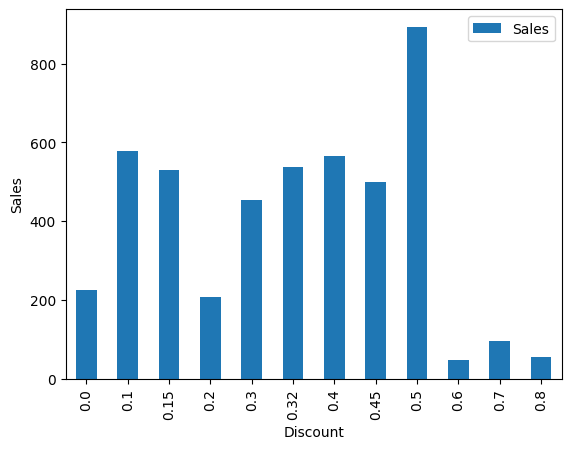

In [ ]:
ax=discount_group.plot(kind="bar")
ax.set_ylabel("Sales")
plt.show()

**The Best salles**
The best salles are when the discount is 50% but this lead to loss in Profit.

The discounts from 10% to 20% is the best solution as they the best in sales and profit.

In [ ]:
avg_proft_margin_by_category=df.groupby("Category")["Profit"].mean()
print(avg_proft_margin_by_category)

Category
Furniture          349.834887
Office Supplies    119.324101
Technology         452.709276
Name: Profit, dtype: float64


**Make datetime features**

In [ ]:
############ Sales forcasting

df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%m/%d/%Y')


In [ ]:
# Extract time features from 'Order Date'
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.day
df['Quarter'] = df['Order Date'].dt.quarter


In [ ]:
# Calculate the shipping duration (in days) between Order Date and Ship Date
df['Shipping Duration'] = (df['Ship Date'] - df['Order Date']).dt.days


**Filter necessary columns for sales forecasting**

In [ ]:

df_sales = df[['Order Date', 'Sales', 'Quantity', 'Discount', 'Profit', 'Year', 'Month', 'Day', 'Quarter']]
df_sales = df_sales.sort_values('Order Date')

**Feature Engineering**

In [ ]:

df_sales['Sales_Lag_1'] = df_sales['Sales'].shift(1)
df_sales['Sales_Lag_2'] = df_sales['Sales'].shift(2)
df_sales['Sales_Lag_3'] = df_sales['Sales'].shift(3)


df_sales['Rolling_Mean_3'] = df_sales['Sales'].rolling(window=3).mean()
df_sales['Rolling_Mean_6'] = df_sales['Sales'].rolling(window=6).mean()

df_sales = df_sales.dropna()


**Split the data into training and test sets (80% train, 20% test)**

Here we can't use Train_test_split which in sklearn because we work with time series ,so we avoid Data Leakage and Over fitting

In [ ]:

train_size = int(len(df_sales) * 0.8)
train_data = df_sales[:train_size]
test_data = df_sales[train_size:]


X_train = train_data.drop(columns=['Sales', 'Order Date'])
y_train = train_data['Sales']
X_test = test_data.drop(columns=['Sales', 'Order Date'])
y_test = test_data['Sales']


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error


model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 11.294416336167204


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming y_test are true values and y_pred are predicted values
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)

# Calculate R² Score
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

# Calculate sMAPE
smape = 100 * np.mean(2 * np.abs(y_test - y_pred) / (np.abs(y_test) + np.abs(y_pred)))
print("Symmetric Mean Absolute Percentage Error (sMAPE):", smape)


Root Mean Squared Error (RMSE): 234.58073620157796
Mean Squared Error (MSE): 55028.121796874315
Mean Absolute Percentage Error (MAPE): 1.608029200073487
R² Score: 0.839634975317047
Symmetric Mean Absolute Percentage Error (sMAPE): 1.605689340805666


**Confusion matrix for percentage error**

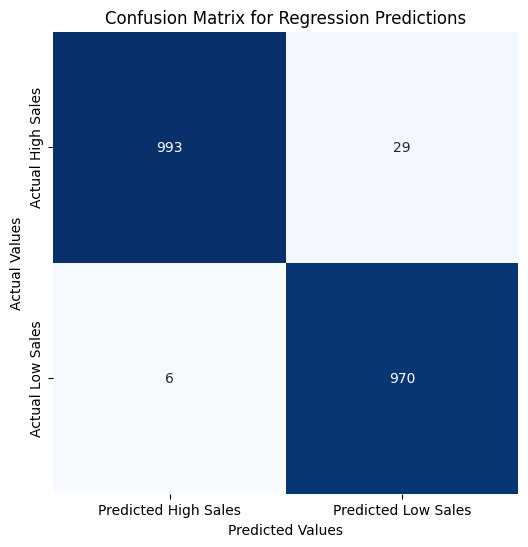

In [ ]:
from sklearn.metrics import confusion_matrix
threshold = 0.1
percentage_error = np.abs(y_test - y_pred) / y_test
tp = (percentage_error <= threshold) & (y_test >= np.median(y_test))  # True Positives
tn = (percentage_error <= threshold) & (y_test < np.median(y_test))   # True Negatives
fp = (percentage_error > threshold) & (y_test < np.median(y_test))    # False Positives
fn = (percentage_error > threshold) & (y_test >= np.median(y_test))   # False Negatives

confusion_values = np.array([[np.sum(tp), np.sum(fp)],
                             [np.sum(fn), np.sum(tn)]])

plt.figure(figsize=(6,6))
sns.heatmap(confusion_values, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted High Sales', 'Predicted Low Sales'],
            yticklabels=['Actual High Sales', 'Actual Low Sales'])
plt.title("Confusion Matrix for Regression Predictions")
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

**Save the trained model**

In [ ]:
import joblib


joblib.dump(model, 'sales_forecasting_model.pkl')
print("Model saved as sales_forecasting_model.pkl")


Model saved as sales_forecasting_model.pkl
